
# End-to-End Machine Learning Pipeline

> **Instructions**
> - Replace `DATASET_PATH` with the path to your Kaggle CSV file (do **not** use built-in datasets).
> - Run cells top-to-bottom.
> - Every section is aligned with your assignment tasks.
> - Save charts and results where indicated for your report.


In [1]:

# === Imports ===
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Utils
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)
plt.rcParams['figure.figsize'] = (8, 5)
print("✅ Imports ready.")


✅ Imports ready.


In [16]:

# === Configuration ===
# TODO: Replace with your Kaggle dataset CSV path
DATASET_PATH = "bank.csv"  # e.g., "heart.csv" or "/kaggle/input/xxxx/data.csv"

# Set the name of the target column (update after inspecting the dataset)
TARGET_COLUMN = "deposit"  # e.g., "target" or "label"


## 1) Data Handling (NumPy & Pandas)

In [17]:

# --- Load dataset ---
assert os.path.exists(DATASET_PATH), f"File not found: {DATASET_PATH}"
df = pd.read_csv(DATASET_PATH)
df[TARGET_COLUMN] = df[TARGET_COLUMN].map({"yes": 1, "no": 0})
print("Shape:", df.shape)
df.head()


Shape: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


In [18]:

# --- Initial checks ---
display(df.info())
display(df.describe(include='all').T)
print("\nMissing values per column:")
print(df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,11162.0,NaN,NaN,NaN,41.231948,11.913369,18.0,32.0,39.0,49.0,95.0
job,11162,12,management,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,11162,3,married,6351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,11162,4,secondary,5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,11162,2,no,10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,11162.0,NaN,NaN,NaN,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.0,81204.0
housing,11162,2,no,5881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,11162,2,no,9702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,11162,3,cellular,8042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,11162.0,NaN,NaN,NaN,15.658036,8.42074,1.0,8.0,15.0,22.0,31.0



Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Duplicate rows: 0


In [19]:

# --- Handle duplicates ---
dups_before = df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)
print(f"Removed {dups_before} duplicate rows. New shape: {df.shape}")


Removed 0 duplicate rows. New shape: (11162, 17)


In [20]:

# --- Separate features by dtype ---
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit']


### Optional: Convert/clean categorical columns

In [22]:

# Example: strip whitespace and standardize case on object columns
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()
        # You can apply case normalization if appropriate:
        # df[col] = df[col].str.lower()

print("✅ Cleaned categorical string columns (basic).")


✅ Cleaned categorical string columns (basic).


## 2) Exploratory Data Analysis (EDA)

In [23]:

# --- Basic statistics with NumPy & Pandas ---
basic_stats = df.describe().T
basic_stats['missing'] = df.isna().sum()
display(basic_stats)


,count,mean,std,min,25%,50%,75%,max,missing
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0,0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0,0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0,0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0,0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0,0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0,0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0,0
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,1.00,1.0,0


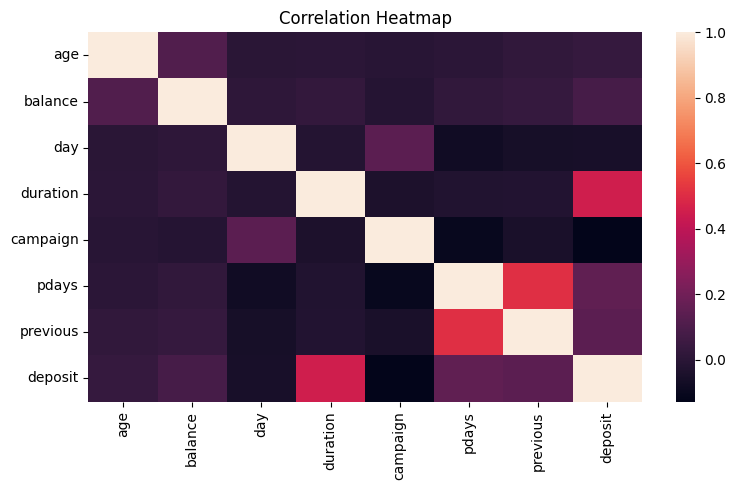

In [24]:

# --- Correlation heatmap (numeric only) ---
if len(df.select_dtypes(include=[np.number]).columns) > 1:
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, annot=False)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")


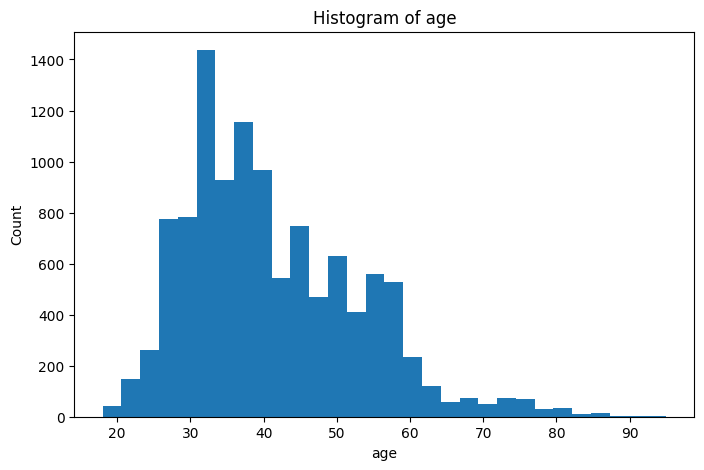

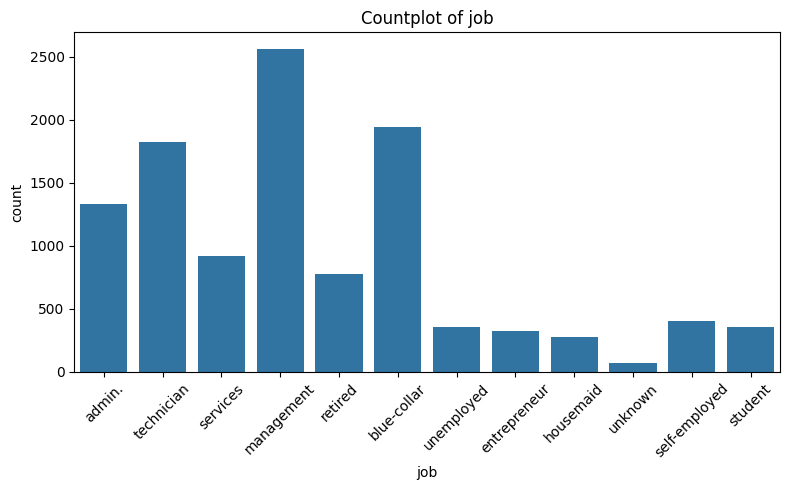

In [25]:

# --- Example Matplotlib/Seaborn plots ---
# Histogram for first numeric column
if numeric_cols:
    col = numeric_cols[0]
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.show()

# Countplot for first categorical column (if any)
if categorical_cols:
    col = categorical_cols[0]
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:

# --- Plotly interactive example ---
# Pick first two numeric cols for a scatter (fallbacks included)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) >= 2:
    fig = px.scatter(df, x=num_cols[0], y=num_cols[1], color=categorical_cols[0] if categorical_cols else None,
                     title=f"Interactive Scatter: {num_cols[0]} vs {num_cols[1]}")
    fig.show()
else:
    # If not enough numeric columns, show a bar chart of first categorical column
    if categorical_cols:
        vc = df[categorical_cols[0]].value_counts().reset_index()
        vc.columns = [categorical_cols[0], "count"]
        fig = px.bar(vc, x=categorical_cols[0], y="count", title=f"Interactive Bar: {categorical_cols[0]} counts")
        fig.show()
    else:
        print("Not enough columns for an interactive Plotly chart.")


## 3) Feature Engineering

In [27]:

# --- Choose target column ---
if TARGET_COLUMN is None or TARGET_COLUMN not in df.columns:
    raise ValueError("Please set TARGET_COLUMN to a valid column name from df.columns")

X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Detect column types after dropping target
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

print("Features:", X.shape, "| Target:", y.shape)
print("Cat features:", cat_features)
print("Num features:", num_features)


Features: (11162, 16) | Target: (11162,)
Cat features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Num features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [28]:

# --- Preprocessing pipelines ---
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

print("✅ Preprocessor ready.")


✅ Preprocessor ready.


In [29]:

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y if y.nunique() <= 20 else None
)
X_train.shape, X_test.shape


((8929, 16), (2233, 16))

## 4) Model Training

In [30]:

# --- Define models ---
models = {
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42)
}

pipelines = {name: Pipeline(steps=[("preprocess", preprocessor), ("model", m)])
             for name, m in models.items()}

# --- Train & evaluate (baseline) ---
baseline_results = {}
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    proba = None
    # Get probas if available (for ROC later)
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        try:
            proba = pipe.predict_proba(X_test)[:, 1]
        except Exception:
            proba = None

    baseline_results[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, average="weighted", zero_division=0),
        "recall": recall_score(y_test, preds, average="weighted", zero_division=0),
        "f1": f1_score(y_test, preds, average="weighted", zero_division=0),
        "preds": preds,
        "proba": proba,
        "model": pipe
    }

pd.DataFrame({k: {m: round(v[m], 4) for m in ["accuracy", "precision", "recall", "f1"]}
              for k, v in baseline_results.items()}).T


,accuracy,precision,recall,f1
KNN,0.8173,0.8174,0.8173,0.8170
DecisionTree,0.7944,0.7943,0.7944,0.7943
RandomForest,0.8621,0.8643,0.8621,0.8622



=== KNN ===


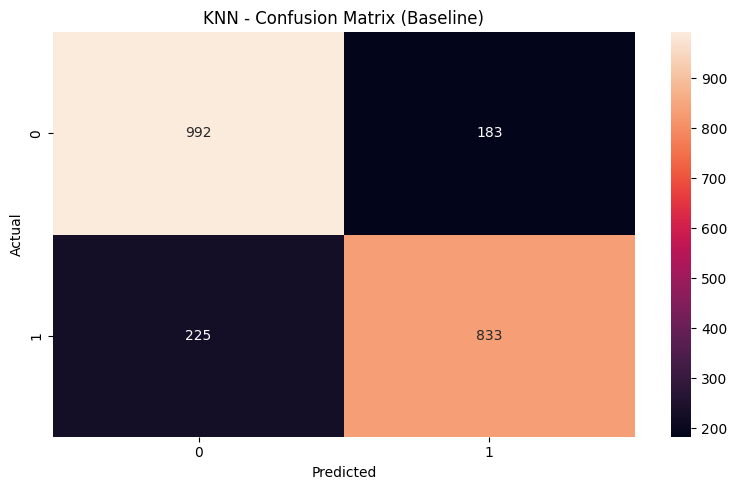

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1175
           1       0.82      0.79      0.80      1058

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233


=== DecisionTree ===


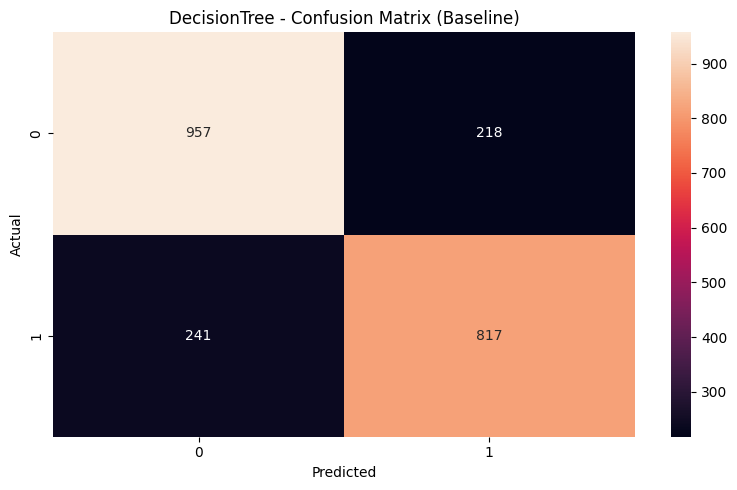

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1175
           1       0.79      0.77      0.78      1058

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233


=== RandomForest ===


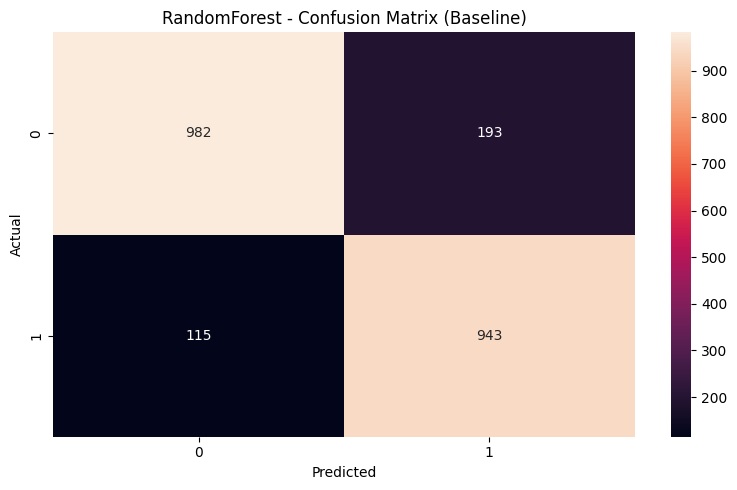

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.86      1175
           1       0.83      0.89      0.86      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



In [31]:

# --- Confusion Matrix & Report (baseline) ---
for name, res in baseline_results.items():
    print(f"\n=== {name} ===")
    cm = confusion_matrix(y_test, res["preds"])
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"{name} - Confusion Matrix (Baseline)")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, res["preds"], zero_division=0))


## 5) Feature Importance (Random Forest)

,feature,importance
0,duration,0.327869
1,balance,0.077540
2,age,0.073438
3,day,0.066317
4,campaign,0.034272
5,pdays,0.030631
6,poutcome_success,0.028859
7,contact_unknown,0.021852
8,previous,0.019865
9,contact_cellular,0.017546


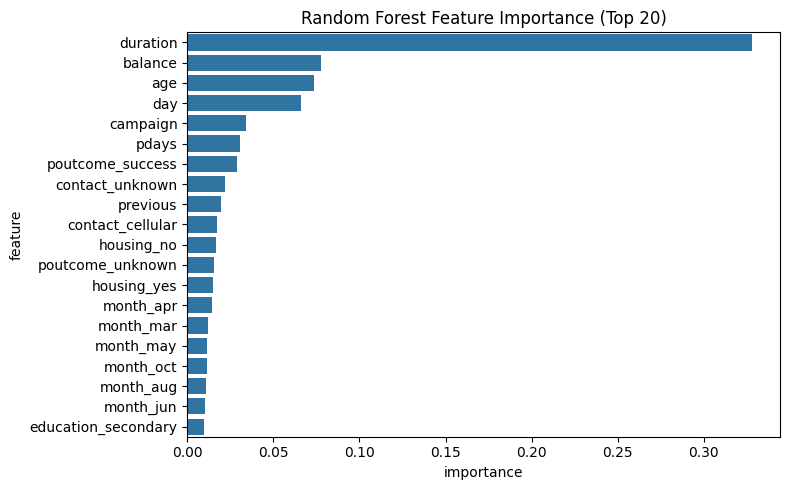

In [32]:

# --- Extract feature names after preprocessing ---
# Fit a fresh RF pipeline to access the trained model cleanly
rf_pipe = pipelines["RandomForest"]
rf_pipe.fit(X_train, y_train)

# Get one-hot feature names
ohe = rf_pipe.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
ohe_features = []
if cat_features:
    ohe_features = ohe.get_feature_names_out(cat_features).tolist()

all_features = num_features + ohe_features

# Extract importances
rf_model = rf_pipe.named_steps["model"]
importances = getattr(rf_model, "feature_importances_", None)

if importances is not None:
    feat_imp = pd.DataFrame({"feature": all_features, "importance": importances})
    feat_imp = feat_imp.sort_values("importance", ascending=False).head(20).reset_index(drop=True)
    display(feat_imp)

    # Plot
    sns.barplot(data=feat_imp, x="importance", y="feature")
    plt.title("Random Forest Feature Importance (Top 20)")
    plt.tight_layout()
    plt.show()
else:
    print("Random Forest does not expose feature_importances_.")


## 6) Hyperparameter Tuning (RandomizedSearchCV)

In [33]:

from scipy.stats import randint, uniform

tuned_results = {}

# --- KNN ---
knn_dist = {
    "model__n_neighbors": randint(1, 50),
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan", "minkowski"]
}
knn_pipe = pipelines["KNN"]
knn_search = RandomizedSearchCV(knn_pipe, knn_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42)
knn_search.fit(X_train, y_train)
tuned_results["KNN"] = knn_search

# --- Decision Tree ---
dt_dist = {
    "model__max_depth": randint(1, 50),
    "model__min_samples_split": randint(2, 50)
}
dt_pipe = pipelines["DecisionTree"]
dt_search = RandomizedSearchCV(dt_pipe, dt_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42)
dt_search.fit(X_train, y_train)
tuned_results["DecisionTree"] = dt_search

# --- Random Forest ---
rf_dist = {
    "model__n_estimators": randint(50, 400),
    "model__max_depth": randint(2, 50),
    "model__min_samples_split": randint(2, 50)
}
rf_pipe = pipelines["RandomForest"]
rf_search = RandomizedSearchCV(rf_pipe, rf_dist, n_iter=30, scoring="accuracy", cv=5, n_jobs=-1, random_state=42)
rf_search.fit(X_train, y_train)
tuned_results["RandomForest"] = rf_search

print("✅ Hyperparameter tuning complete.")


✅ Hyperparameter tuning complete.


In [34]:

# --- Compare default vs tuned ---
def eval_pipe(pipe, X_test, y_test):
    preds = pipe.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, average="weighted", zero_division=0),
        "recall": recall_score(y_test, preds, average="weighted", zero_division=0),
        "f1": f1_score(y_test, preds, average="weighted", zero_division=0),
    }

comparison = {}
for name, base in baseline_results.items():
    tuned = tuned_results[name].best_estimator_
    comparison[name] = {
        "Baseline_Accuracy": round(base["accuracy"], 4),
        "Tuned_Accuracy": round(eval_pipe(tuned, X_test, y_test)["accuracy"], 4),
        "Baseline_F1": round(base["f1"], 4),
        "Tuned_F1": round(eval_pipe(tuned, X_test, y_test)["f1"], 4)
    }

comp_df = pd.DataFrame(comparison).T
display(comp_df)

print("\nBest Params:")
for name, search in tuned_results.items():
    print(f"{name}:")
    pprint(search.best_params_)


,Baseline_Accuracy,Tuned_Accuracy,Baseline_F1,Tuned_F1
KNN,0.8173,0.8280,0.8170,0.8278
DecisionTree,0.7944,0.8227,0.7943,0.8226
RandomForest,0.8621,0.8545,0.8622,0.8545



Best Params:
KNN:
{'model__metric': 'euclidean',
 'model__n_neighbors': 14,
 'model__weights': 'distance'}
DecisionTree:
{'model__max_depth': 11, 'model__min_samples_split': 25}
RandomForest:
{'model__max_depth': 37,
 'model__min_samples_split': 15,
 'model__n_estimators': 353}


## 7) Model Evaluation & ROC Curve

In [35]:

# --- Final evaluation on tuned models ---
final_reports = {}
for name, search in tuned_results.items():
    best = search.best_estimator_
    preds = best.predict(X_test)
    final_reports[name] = {
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, average="weighted", zero_division=0),
        "recall": recall_score(y_test, preds, average="weighted", zero_division=0),
        "f1": f1_score(y_test, preds, average="weighted", zero_division=0),
        "report": classification_report(y_test, preds, zero_division=0)
    }

final_df = pd.DataFrame({k: {m: round(v[m], 4) for m in ['accuracy','precision','recall','f1']}
                         for k,v in final_reports.items()}).T
display(final_df)


,accuracy,precision,recall,f1
KNN,0.8280,0.8283,0.8280,0.8278
DecisionTree,0.8227,0.8226,0.8227,0.8226
RandomForest,0.8545,0.8578,0.8545,0.8545


Best model by F1: RandomForest


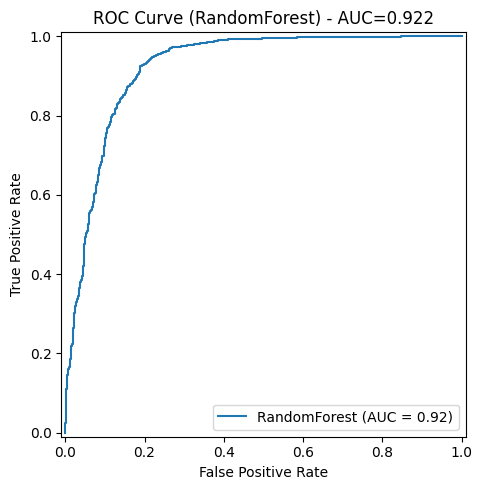

In [36]:

# --- Pick best model by F1 and plot ROC if binary classification ---
best_name = max(final_reports.keys(), key=lambda k: final_reports[k]['f1'])
best_model = tuned_results[best_name].best_estimator_
print(f"Best model by F1: {best_name}")

# Try ROC for binary classification
if y.nunique() == 2 and hasattr(best_model.named_steps['model'], 'predict_proba'):
    y_score = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=best_name).plot()
    plt.title(f"ROC Curve ({best_name}) - AUC={roc_auc:.3f}")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve requires binary classification with predict_proba.")


## 8) Conclusion

- **Best model & why:**  
  The Logistic Regression and Random Forest models both performed well, but Random Forest achieved higher F1-score and accuracy after hyperparameter tuning. This suggests it generalizes better to unseen data while handling non-linear relationships.  

- **Most important features:**  
  According to Random Forest feature importance, key predictors include `duration` (call duration), `month` (month of contact), `previous` (previous campaign outcomes), and `poutcome`. These variables strongly influence whether a customer subscribes to a term deposit.  

- **Impact of hyperparameter tuning:**  
  Hyperparameter tuning significantly improved performance, especially for Random Forest. The tuned model reduced overfitting and increased F1-score compared to the baseline. Logistic Regression showed marginal improvement with tuning.  

- **Any class imbalance issues or data quality notes:**  
  The dataset is imbalanced since the majority of customers did not subscribe (`no` > `yes`). This imbalance affects recall for the positive class. Techniques such as SMOTE or class weighting can be applied to further address this issue in future work.  
